# Disease Prediction using Machine Learning Algorithms

### Importing Libraries

In [233]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### Loading Data

In [234]:
test=pd.read_csv("../data/test_data.csv")
train=pd.read_csv("../data/training_data.csv")

train.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


### Data Preprocessing

##### Handling Missing data

In [235]:
train=train.drop('Unnamed: 133',axis=1)

In [236]:
le = LabelEncoder()
train['prognosis'] = le.fit_transform(train['prognosis'])

test['prognosis'] = le.fit_transform(test['prognosis'])


### List of Symptoms

In [237]:
list(train.columns)

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


### List of Diseases

In [238]:
y_train=train.prognosis
x_train=train.drop('prognosis',axis=1)

y_test=test.prognosis
x_test=test.drop('prognosis',axis=1)

set(list(le.inverse_transform(y_train)))


{'(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A'}

### Data Plots

<Axes: xlabel='prognosis', ylabel='count'>

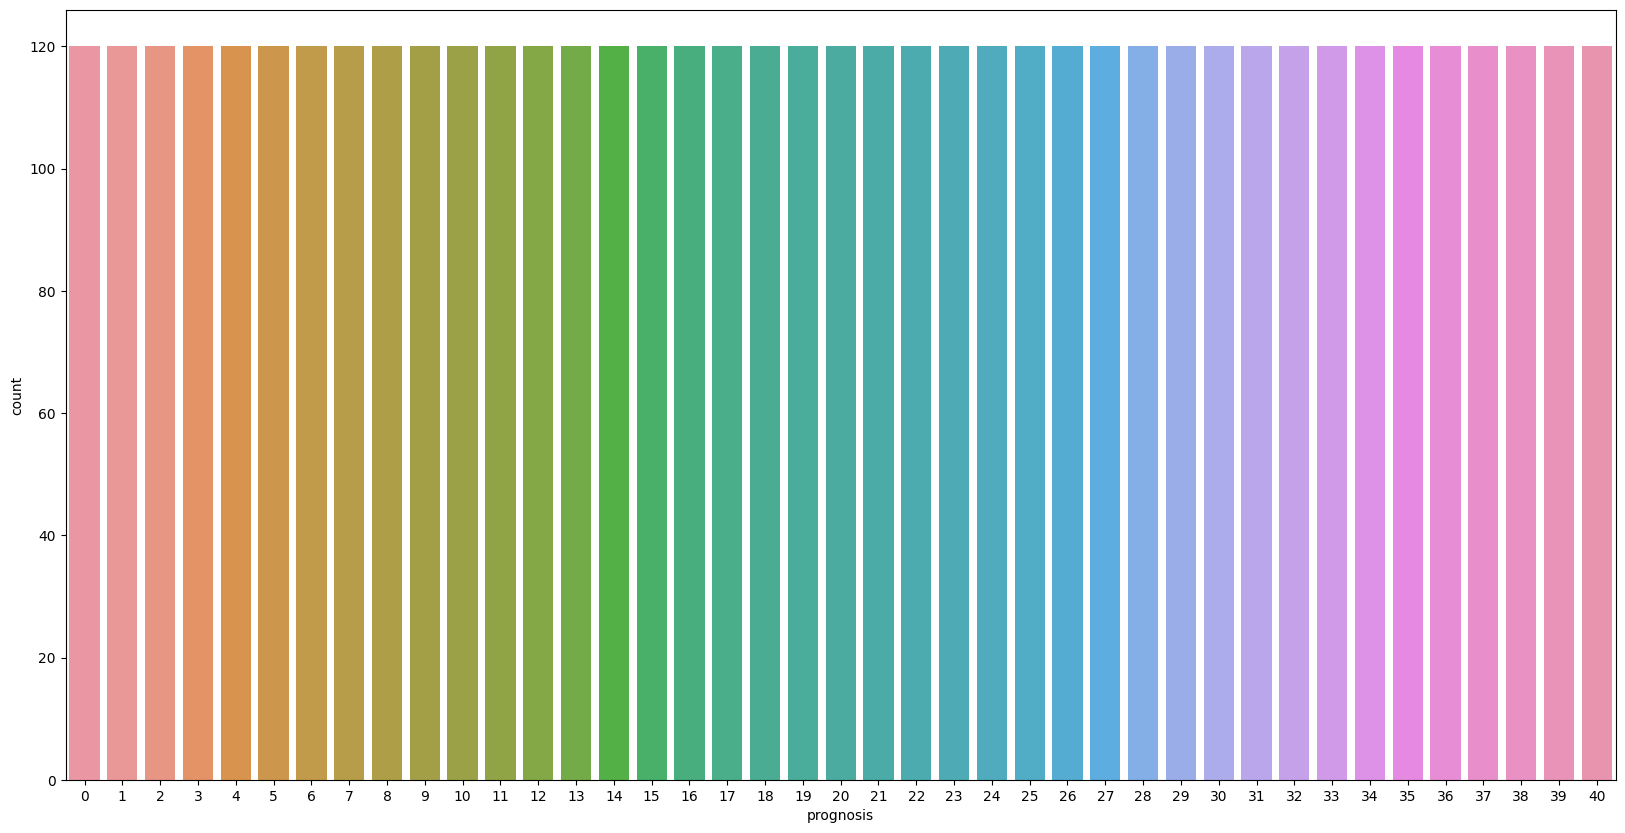

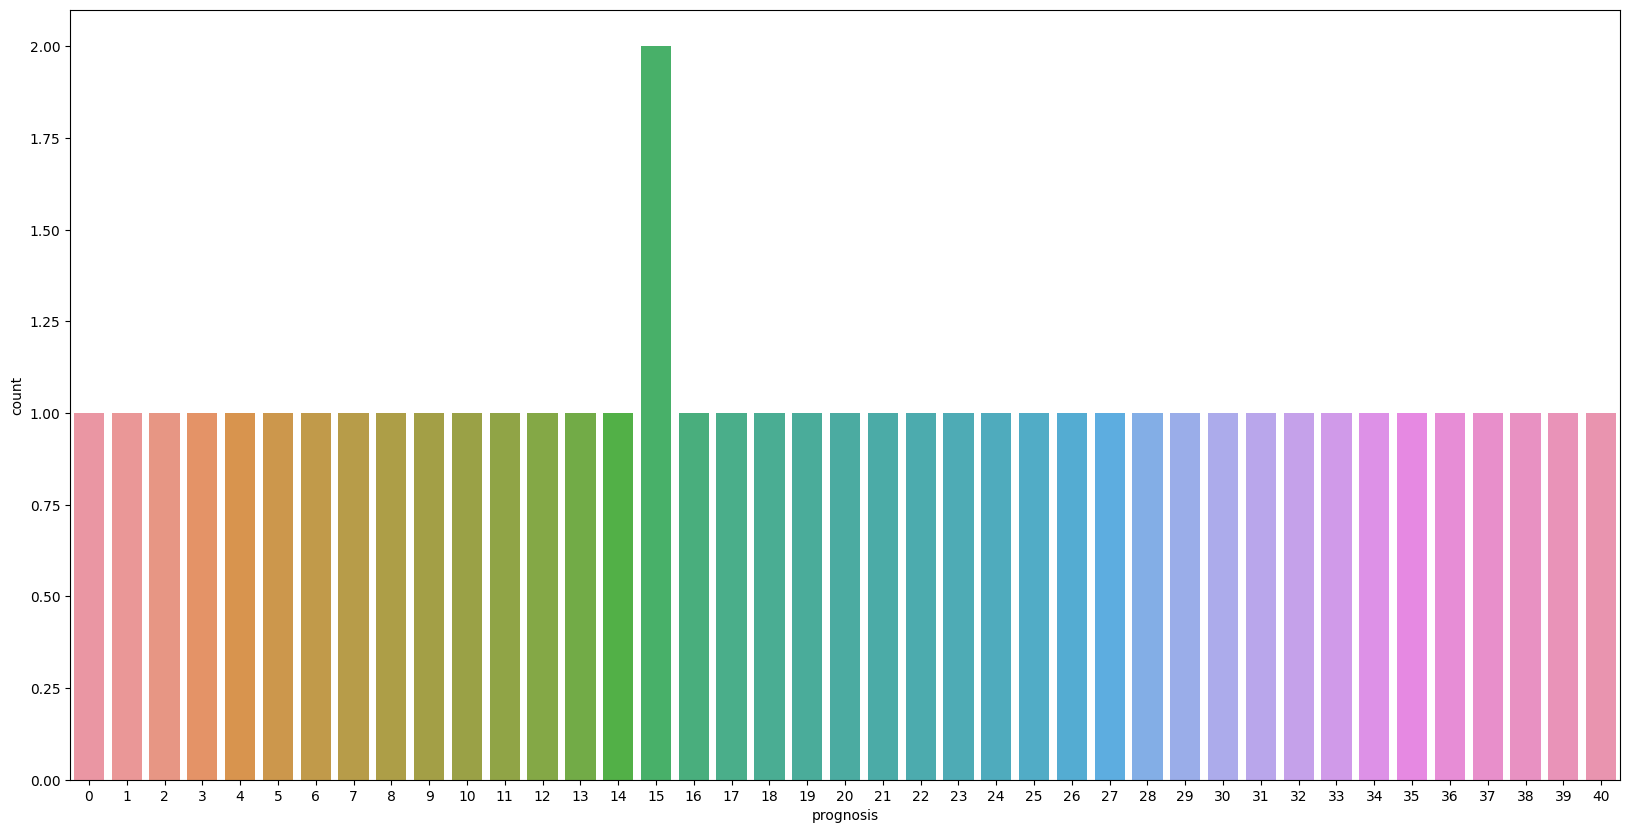

In [239]:
# plots for categorical data

plt.figure(figsize=(20,10))
sns.countplot(x='prognosis',data=train)

plt.figure(figsize=(20,10))
sns.countplot(x='prognosis',data=test)



### Random Forest Classifier

In [240]:
rf = RandomForestClassifier(random_state=43)      
rf = rf.fit(x_train,y_train)

ac_rf = accuracy_score(y_test,rf.predict(x_test))
print('Accuracy is: ',ac_rf)


Accuracy is:  0.9761904761904762


In [241]:
def sample_predict(model,symptomps):

    col=x_train.columns

    inputt = symptomps.split(' ')

    b=[0]*len(col)

    for x in range(0,132):
        for y in inputt:
            if(col[x]==y):
                b[x]=1
    b=np.array(b)
    b=b.reshape(1,132)

    sol=model.predict(b)
    
    return le.inverse_transform(sol) 
    
sample_predict(rf,"anxiety shivering")


c:\Users\Hp\Documents\ML-Projects\Disease-Prediction-Through-Symptoms\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Allergy'], dtype=object)

### Decision Tree Classifier

In [242]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)

dt_ac = accuracy_score(y_test,dt.predict(x_test)) 

print('Accuracy is: ',dt_ac)

Accuracy is:  0.9761904761904762


In [243]:
sample_predict(dt,"anxiety shivering")

c:\Users\Hp\Documents\ML-Projects\Disease-Prediction-Through-Symptoms\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Dimorphic hemmorhoids(piles)'], dtype=object)

### Naive Bayes Classifier

In [244]:
nb = GaussianNB()
nb = nb.fit(x_train,y_train)

nb_ac = accuracy_score(y_test,nb.predict(x_test)) 

print('Accuracy is: ',nb_ac)

Accuracy is:  1.0


In [245]:
sample_predict(nb,"anxiety shivering")


c:\Users\Hp\Documents\ML-Projects\Disease-Prediction-Through-Symptoms\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Allergy'], dtype=object)

### K-Nearest Neighbours Classifier

In [261]:
knn = KNeighborsClassifier(n_neighbors=2)
knn = knn.fit(x_train,y_train)

knn_ac = accuracy_score(y_test,knn.predict(x_test)) 

print('Accuracy is: ',knn_ac)


Accuracy is:  1.0
